In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [4]:
train_mnist = torchvision.datasets.MNIST(root = ".",train = True,transform = transforms.ToTensor(),download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 343845305.29it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 10846677.46it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 157824997.64it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21453298.16it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
test_mnist = torchvision.datasets.MNIST(root=".",train = False,transform= transforms.ToTensor())

In [6]:
#dataloader

batch_size = 128
train_loader = torch.utils.data.DataLoader(batch_size=batch_size, dataset = train_mnist,shuffle = True)
test_loader = torch.utils.data.DataLoader(batch_size  = batch_size, dataset = test_mnist, shuffle =False)

In [14]:
#building model (OOPs)

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()

    self.conv = nn.Sequential(nn.Conv2d(in_channels = 1,out_channels = 32,kernel_size=3, stride = 2 ),
                              nn.Conv2d(in_channels = 32,out_channels = 64,kernel_size=3, stride = 2),
                              nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size=3, stride = 2))
    self.dense = nn.Sequential( nn.Dropout(0.1),
                               nn.Linear(128*2*2,256),
                               nn.ReLU(),
                               nn.Dropout(0.1),
                               nn.Linear(256,10)
        
                               
  )
    
  def forward(self,x):

    out = self.conv(x)
    out = out.view(out.size(0),-1)
    out = self.dense(out)
    return out


    



In [15]:
model = CNN()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  )
  (dense): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [18]:
#training

epochs = 15
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)


for i in range(epochs):

  train_losses = []
  model.train()
  for inputs,targets in train_loader:


    optimizer.zero_grad()

    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)

    loss_train.backward()

    optimizer.step()

    train_losses.append(loss_train.item())
  
  train_losses = np.mean(train_losses)


  test_losses  = []
  model.eval()
  for inputs,targets in test_loader:

    inputs,targets = inputs.to(device),targets.to(device)

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)

    test_losses.append(loss_test.item())

  test_losses = np.mean(test_losses)


  train_loss[i] = train_losses
  test_loss[i] = test_losses

  print(f"epoch- 1/{i+1} -- training loss -- {train_losses} -- test loss -- {test_losses}")

epoch- 1/1 -- training loss -- 0.2954475003630241 -- test loss -- 0.11139754509211436
epoch- 1/2 -- training loss -- 0.12706406597596115 -- test loss -- 0.08762176272524166
epoch- 1/3 -- training loss -- 0.09934491357768077 -- test loss -- 0.08487633246445109
epoch- 1/4 -- training loss -- 0.08637311810782469 -- test loss -- 0.0891480986441521
epoch- 1/5 -- training loss -- 0.07701318320840089 -- test loss -- 0.0780524563175461
epoch- 1/6 -- training loss -- 0.07131488534457076 -- test loss -- 0.08400132909234424
epoch- 1/7 -- training loss -- 0.06550962769630939 -- test loss -- 0.07123921413972599
epoch- 1/8 -- training loss -- 0.061117116541567956 -- test loss -- 0.08369797894920339
epoch- 1/9 -- training loss -- 0.056855452941484384 -- test loss -- 0.07232678887033481
epoch- 1/10 -- training loss -- 0.051097871807675915 -- test loss -- 0.07366969795084169
epoch- 1/11 -- training loss -- 0.049653651663906444 -- test loss -- 0.07475229024880085
epoch- 1/12 -- training loss -- 0.048448

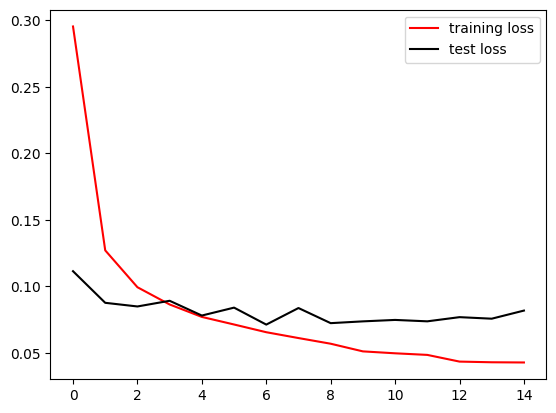

In [20]:
plt.plot(train_loss,label = "training loss", c = "r")
plt.plot(test_loss,label = "test loss", c = "black")
plt.legend()
plt.show()

In [21]:
model.eval()

n_correct = 0
n_total = 0 

for inputs,targets in train_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  outputs = model(inputs)

  _ , preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)


train_acc = n_correct/n_total




n_correct = 0 
n_total = 0
for inputs,targets in test_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  outputs = model(inputs)

  _, preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)

test_acc = n_correct/n_total


print(f"training accuracy -- {train_acc} , test accuracy -- {test_acc}")

training accuracy -- 0.9926833333333334 , test accuracy -- 0.9786
